# Módulo 5 - Técnicas de Programação II | Python

## Projeto Final - História das Olimpíadas

Este projeto consiste em uma análise de dados históricos dos jogos olímpicos.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

## Metadados:

O arquivo ```athlete_events.csv``` contém 271116 linhas e 15 colunas. Cada linha corresponde a um indivíduo (atleta) que competiu em um evento olímpico individual. Veja a descrição das 15 colunas, a seguir:

- **ID:** Valor único para cada atleta
- **Name:** Nome do atleta
- **Sex:** Gênero do atleta (M para masculino e F para feminino)
- **Age:** Idade do atleta no momento da competição
- **Height:** Altura do atleta, em centímetros
- **Weight:** Peso do atleta, em kg
- **Team:** Nome do time
- **NOC:** National Olympic Committee (código de 3 letras)
- **Games:** Ano e temporada dos jogos
- **Year:** Ano dos jogos
- **Season:** Temporada dos jogos (summer para verão e winter para inverno)
- **City:** Cidade em que ocorreu os jogos
- **Sport:** Esporte praticado pelo atleta
- **Event:** Categoria/modalidade da competição
- **Medal:** Medalha adquirida: Gold (ouro), Silver (prata), Bronze ou NA

Fazendo os imports básicos para o projeto:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Verificando os dados do *dataset*

In [2]:
dataset = pd.read_csv('data/athlete_events.csv')

dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
dataset['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [4]:
dataset[dataset['NOC']=='BRA']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268652,134400,"Maria Jos ""Zz"" Bertolotti",F,26.0,190.0,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NaN
269745,134976,Sieglinda Lenk Zigler,F,17.0,NaN,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Backstroke,NaN
269899,135037,Moacir Zimmermann,M,32.0,184.0,70.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
270478,135289,Zzimo Alves Calazans,M,20.0,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN


## O Brasil nas olímpiadas

**1.** Crie um DataFrame contendo apenas informações sobre atletas **brasileiros**. Exiba a quantidade de linhas desse novo DataFrame.

In [5]:
br_df = dataset[dataset['NOC']=='BRA']

br_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN


Descrevendo o DataFrame:

In [6]:
rows_and_cols, col_description = br_df.shape, br_df.columns

print(f'O dataframe tem o seguinte formato (linhas x colunas): {rows_and_cols}\nColunas do dataframe: {col_description}')

O dataframe tem o seguinte formato (linhas x colunas): (3848, 15)
Colunas do dataframe: Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


**2. Será que existe alguma correlação entre a altura do atleta e seu desempenho, para algum esporte? Faça essa análise separadamente para cada gênero, e conclua.**

Gere um ou mais gráficos de sua escolha, em que seja possível comparar as alturas dos atletas de cada esporte, separando-os por gênero. Se necessário, crie colunas ou DataFrames auxiliares.

**Facilitador:** se quiser, analise apenas os esportes em que se tenha ao menos 5 atletas medalhistas e 5 atletas não medalhistas, para facilitar visualizações e conclusões.

In [7]:
br_df.insert(15, 'Medal_numerical', br_df['Medal'])

In [8]:
br_df['Medal_numerical'] = br_df['Medal'].fillna(0)
br_df['Medal_numerical'] = br_df['Medal_numerical'].replace({0:0, 'Bronze':1, 'Silver':2, 'Gold':3})
br_df['Medal_numerical'] = pd.Categorical(br_df['Medal_numerical'], [0, 1, 2, 3], ordered=True)

br_df.head(10)

/tmp/ipykernel_142038/3277095604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_df['Medal_numerical'] = br_df['Medal'].fillna(0)
/tmp/ipykernel_142038/3277095604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_df['Medal_numerical'] = br_df['Medal_numerical'].replace({0:0, 'Bronze':1, 'Silver':2, 'Gold':3})
/tmp/ipykernel_142038/3277095604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_numerical
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN,0
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN,0
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,0
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN,0
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN,0
1017,569,Paulo Francisco Joazeiro de Abreu,M,18.0,176.0,78.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Water Polo,Water Polo Men's Water Polo,NaN,0
1235,695,Ricardo Augusto Amaral Acioly,M,24.0,179.0,78.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Tennis,Tennis Men's Doubles,NaN,0
1339,756,Adalberto Pereira da Silva,M,25.0,189.0,105.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Handball,Handball Men's Handball,NaN,0
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver,2
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver,2


In [13]:
br_df['Medal_numerical'].unique()

[0, 2, 3, 1]
Categories (4, int64): [0 < 1 < 2 < 3]

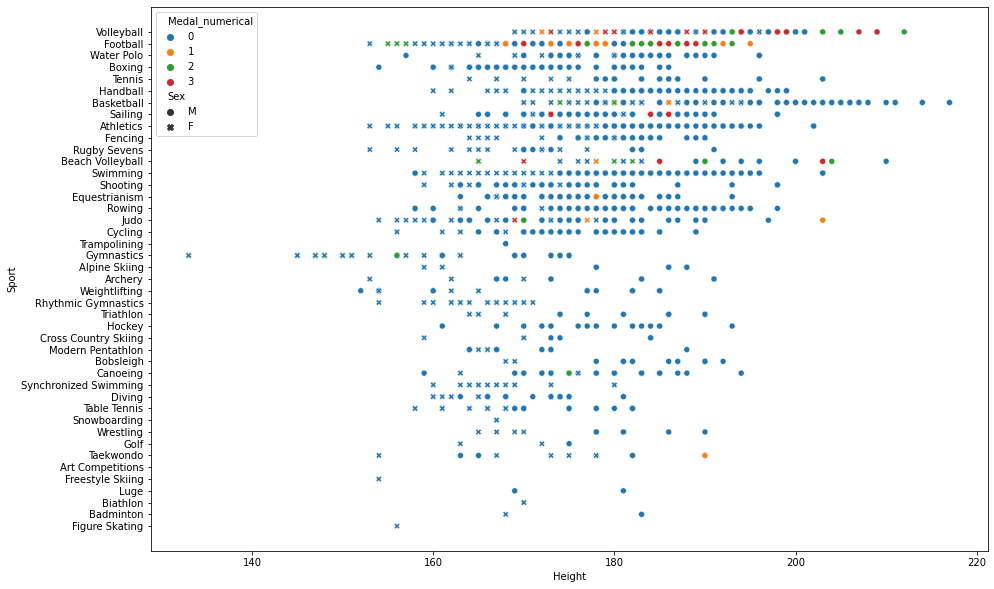

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=br_df, x='Height', y='Sport', hue='Medal_numerical', style='Sex')
plt.show()

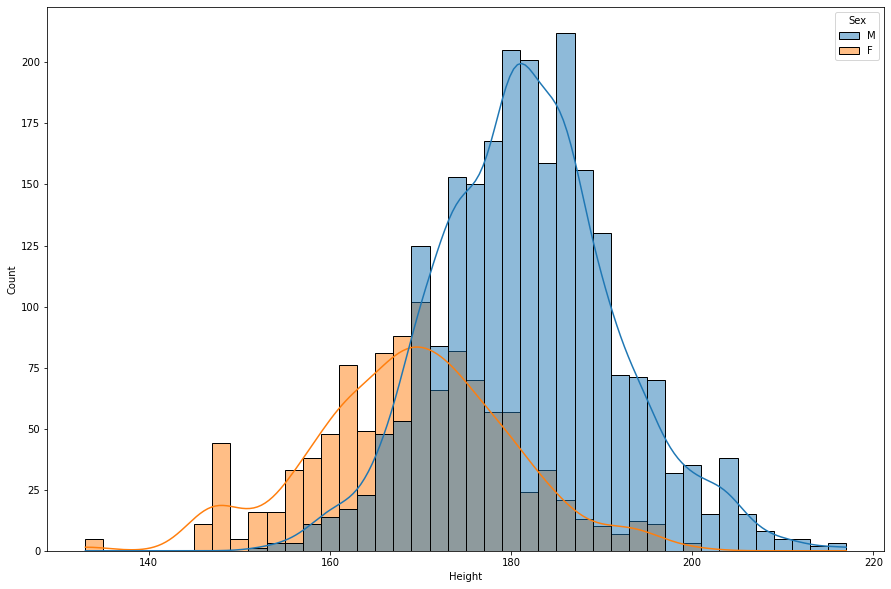

In [9]:
plt.figure(figsize=(15,10))
sns.histplot(data=br_df, x='Height', hue='Sex', kde=True)
plt.show()

Para esportes como basquetebol, vôleibol, vôlei de praia, e natação, os atletas mais altos (altura > 180cm para homens e altura > 170cm para mulheres) conseguiram medalhas. Isso implica que, para estes esportes, altura é um fator predominante no desempenho. O gênero apenas influencia na distribuição de alturas, sendo os homens predominantemente maiores que as mulheres, como demonstrado no primeiro gráfico, onde a distribuição de alturas entre atletas masculinos e atletas femininos é distintamente separadada. Curiosamente, a distribuição de atletas de âmbos os gêneros é bimodal - tendo picos em 150cm e 170cm para as mulheres, e 170cm e 190cm para homens.

**3. Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.**

Crie uma visualização de sua preferência para mostrar, por esporte, a proporção de medalhas de ouro, prata e bronze que nosso país já consquistou.

**Facilitador:** Se preferir, mostre as proporções apenas para os 6 esportes que tiveram mais medalhas.  

*DICA:* Cuidado! Esportes em equipe dão medalhas a todos os jogadores, mas só contabilizam uma vez!

In [11]:
 medalists_br = br_df.dropna(subset=['Medal'])
 
 
 medalists_br['Sport'].unique()

array(['Football', 'Volleyball', 'Sailing', 'Basketball',
       'Beach Volleyball', 'Boxing', 'Shooting', 'Swimming', 'Athletics',
       'Judo', 'Equestrianism', 'Taekwondo', 'Gymnastics',
       'Modern Pentathlon', 'Canoeing'], dtype=object)

**4. Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras.**

Crie um gráfico de sua escolha, que mostre o total de medalhas de ouro, prata e bronze, por edição da olimpíada (em ordem cronológica). 

*DICA:* Mais uma vez, tome cuidado com os esportes em grupo - os contabilize apenas uma vez!

In [12]:
medals_over_time = dataset[(dataset)]

ValueError: Boolean array expected for the condition, not int64

**5. Agora é com vocês!** 

Escolha uma análise visual que julga interessante de fazer neste conjunto de dados, faça o(s) gráficos(s) necessários e comente os resultados. 

Distribuição de medalhas de ouro por país:

In [ ]:
gmedal_country = dataset[(dataset['Medal'] == 'Gold')]

total_gmedal = gmedal_country['Team'].value_counts().reset_index(name = 'Medal')

total_gmedal

Como há muitos países com resultados insignificantes, vamos ficar com os que tem mais de 300 medalhas apenas:

In [ ]:
three_hundo_medal_club = total_gmedal[(total_gmedal['Medal'] >= 300)]

three_hundo_medal_club

In [ ]:
most_medals_plot = sns.catplot(data=three_hundo_medal_club, 
                 x='index', 
                 y='Medal', 
                 kind='bar', 
                 height=8, aspect=15/8)

most_medals_plot.set(xlabel='Países',
       ylabel='Número de Medalhas', 
       title='Países com Ao Menos 100 Medalhas Olímpicas', 
       )

plt.xticks(rotation=45);

Observação: considerando o desempenho olímpico recente da República Popular da China, tem-se a impressão que este dataset não está atualizado.

Uma outra análise visual interessante é ver o aumento de medalhas nas categorias femininas ao longo dos anos.

In [ ]:
women_medals = dataset[(dataset['Sex'] == 'F') & (dataset['Season'] == 'Summer')]

women_medals.head()

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Número de Medalhas Para Atletas Mulheres ao Longo do Tempo')
plt.ylabel('Contagem Total')
fem_olympics = sns.countplot(data=women_medals, x='Year')
plt.show()

Ao ver o crescimento incremental do número de medalhas por atletas mulheres ao longo do tempo, é evidente que a participação feminina nos jogos olímpicos é cada vez maior.

Duas curiosidades: os mergulhos da contagem em 1956 e 1980 provavelmente foram causados pelos boicotes de alguns dos países que iriam aprticipar: 
* Em 1956, em Melbourne, devido so incidente no Canal de Suez e devido à invasão da Hungria pelos soviéticos (https://en.wikipedia.org/wiki/1956_Summer_Olympics#:~:text=Eight%20teams%20boycotted,citation(s)%20needed%5D).

* Em 1980, devido à invasão soviética ao Afeganistão (https://en.wikipedia.org/wiki/1980_Summer_Olympics#:~:text=Led%20by%20the%20United%20States%2C%2066%20countries%20boycotted%20the%20games%20entirely%2C%20because%20of%20the%20Soviet%E2%80%93Afghan%20War.)
